# PROYECTO FINAL

1.Análisis léxico, eliminando todos los signos de puntuación, números y convirtiendo a minúsculas.
2.Eliminación de palabras cerradas/vacías.
3.Llevar a cabo el truncamiento o segmentación, obteniendo las raíces de las palabras.

# 1.Análisis léxico, eliminando todos los signos de puntuación, números y convirtiendo a minúsculas.

In [1]:
def Preprocesamiento():
    Analisis_Lexico()
    Eliminar_Palabras_Vacias()
    Obtener_Raiz_de_Palabras()

## ELIMINANDO SIGNOS DE PUNTUACIÓN
Tomando el archivo original continuamos con el preprocesamiento eliminando signos de puntuacion,numero y pasando a minusculas.
Para remover (signos de puntuación) utilizaremos las siguiente bibliotecas:

In [2]:
import re                              #IMPORTADA PARA ELIMINAR SIGNOS DE PUNTUACIÓN
import unicodedata                     #IMPORTADA PARA ELIMINAR TILDES
import Stemmer                         #PARA STEMM
stemmer = Stemmer.Stemmer('spanish')   
import io                              #PARA STOPWORDS
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize 

In [3]:
numeros=('uno','dos','tres','cuatro','cinco','seis','siete','ocho','nueve','diez','veinte','treinta','cuarenta','cincuenta','sesenta','ochenta','noventa','cien','mil','millon')

In [4]:
def elimina_tildes(cadena):
    s = ''.join((c for c in unicodedata.normalize('NFD',cadena) if unicodedata.category(c) != 'Mn'))
    return s

In [5]:
def Analisis_Lexico():
    with open("ProyectoF.txt",encoding='utf8') as archivo:
        for linea in archivo:
            #ELIMINA TILDES
            linea = elimina_tildes(linea)
            #QUITA LOS SIGNOS DE PUNTUACION
            patron = "[“-”-…►.,;:""'()?¿!¡\"_*%—|]" #AGREGUE \ PARA PODER DETECTAR "
            regex =re.compile(patron)
            linea = regex.sub('',linea.lower()) #Eliminamos signos de puntuacion y Lower pasa a minusculas el texto
            linea = re.sub(' +', ' ', linea) #quita todos los dobles espacios
            linea = re.sub(r'[0-9]+', '', linea) #ELIMINA LOS NUMEROS
            #CAMBIA LA ETIQUETA DE LINKS
            words = linea.split() 
            character = ''
            for word in words:
                character = word[0]
                http = word[0:4]
                if http == 'http':
                    linea=linea.replace(str(word),"")
            if not word in numeros:
                file = open("Analisis_Lexico.txt", "a", encoding='utf-8')
                file.write(linea)
                file.close()

# 2.Eliminación de palabras cerradas/vacías.

## REMOVER PALABRAS VACIAS
Para la practica se guarda un archivo que aun contienen palabras vacias y otro que no, para este ultimo haremos uso de io y de nltk importando stopword que tienen un repertorio de varias palabras vacias (naturalmente usa el ingles).

In [6]:
stop_words_sp_en = set() #CONJUNTO QUE AGREGARA LAS PALABRAS VACIAS EN ESPAÑOL SIN TILDE
import io  
from nltk.corpus import stopwords  
from nltk.tokenize import word_tokenize  
stop_words = set(stopwords.words('Spanish')) 
#LE QUITAMOS LAS TILDES DEBIDO A QUE AL BUSCAR LE HABREMOS QUITADOS LAS TILDES A NUESTROS DOCUMENTOS
for palabra in stop_words:
    palabrasinT=elimina_tildes(palabra)
    stop_words_sp_en.add(palabrasinT)
#MEZCLAMOS LAS STOPWORDS EN INGLES Y ESPAÑOL
stop_words_sp_en.update(set(stopwords.words('English'))) 

Se lee el archivo modificado (Analisis_Lexico) y apartir de el se comienza a actualizar removiendo las palabras que si se encuentran en stopwords, este nuevo documento se llamara Eliminar_Palabras_Vacias

In [7]:
def Eliminar_Palabras_Vacias():
    with open("Analisis_Lexico.txt",encoding="utf8") as file1:  
        for linea in file1:
            words = linea.split() 
            for word in words:
                if not word in stop_words_sp_en:
                    appendFile = open('Eliminar_Palabras_Vacias.txt', "a",encoding="utf8")
                    appendFile.write(word+" ")  
            appendFile.write("\n")
            #appendFile.close() 
    file1.close()

# 3.Llevar a cabo el truncamiento o segmentación, obteniendo las raíces de las palabras.

## STEMM
Obtenemos la raiz de las palabras

In [8]:
def Obtener_Raiz_de_Palabras():
    with open("Eliminar_Palabras_Vacias.txt",encoding="utf8") as file1:  
        for linea in file1:
            words = linea.split()
            words = stemmer.stemWords(words)
            words = stemmer.stemWords(words)
            for word in words:
                appendFile = open('Obtener_Raiz_de_Palabras.txt', "a",encoding="utf8")
                appendFile.write(word+" ")  
            appendFile.write("\n")
            #appendFile.close() 
    file1.close()

## SE LLAMA AL METODO QUE HACE EL PREPROCESAMIENTO

In [9]:
Preprocesamiento()

In [10]:
import re
noticia=""  
bandera=0
i=0
with open("Obtener_Raiz_de_Palabras.txt",encoding="utf8") as file1:  
        for linea in file1:
            if  linea.rstrip() == "</cuerpo>":
                bandera=0
                new_noticia = re.sub(r'\n', '', noticia)
                file = open("Noticias.txt", "a", encoding='utf-8')
                file.write(new_noticia)
                file.write('\n')
                file.close()
                noticia=""
                '''print("Noticia",i+1,new_noticia+"\n")
                i=i+1'''
            if  bandera==1:
                noticia = noticia+linea
            if linea.rstrip() == "<cuerpo>":
                bandera=1      

# 4.Obtener alguna representación de los documentos.

# TF-IDF

## OBTENCIÓN DE TODOS LOS TERMINOS
Leemos el archivo llamado Noticias.txt para poder obtener todos los terminos del documento (sin repetirlos)

In [11]:
terminos=[]
tabla=[]
with open("Noticias.txt",encoding="utf8") as file1:#LEECTURA DEL DOCUMENTOS PARA LA OBTENCION DE TERMINOS  
    for linea in file1:
        words = linea.split() 
        for word in words:
            terminos.append(word)                               #AGREGAMOS LA PALABRA A LA LISTA TERMINOS 
    terminos = list(set(terminos))                              #PARA QUITAR LOS TERMINOS REPETIDOS DE LA LISTA
file1.close()

#### IMPRIMIMOS LOS TERMINOS

In [12]:
import pandas as pd
pd.DataFrame(terminos)

,0
0,esol
1,conmemoracion
2,telon
3,tramit
4,cualqui
...,...
4792,ocurr
4793,divert
4794,declaracion
4795,anderson


## FRECUENCIA 

In [13]:
documentos = []
with open("Noticias.txt",encoding="utf8") as file1:  
    for linea in file1:
        words = linea.split()                      #WORDS SON LAS PALABRAS DE NUESTRO DOCUMENTO/LINEA (LISTA)
        numDePalabras = dict.fromkeys(terminos, 0) #ASIGNAMOS 0 A LOS TERMINOS DE NUESTRO DICCIONARIO (NUMDEPALABRAS)
        for word in words:                         #POR CADA PALABRA DE NUESTRO DOCUMENTO
            numDePalabras[word] += 1               #CONTAMOS CUANTAS VECES SE ENCUENTRA ESA PALABRA EN EL DOCUMENTO Y ACTUALIZAMOS EL DICCIONARIO
        tabla.append(numDePalabras)                #NUESTRA TABLA ES UNA LISTA DE DICCIONARIOS (1 DICCIONARIO POR CADA DOCUMENTO)
        documentos.append(words)
file1.close()

#### IMPRIMIMOS LA TABLA DE FRECUENCIA

In [14]:
import pandas as pd
df_rrss=pd.DataFrame(tabla)    #SE CREA UN DATAFRAME DE LA TABLA CREADO ANTERIORMENTE
df_rrss1 = df_rrss.transpose() #SE CAMBIAN LAS FILAS POR LAS COLUMNAS Y LAS COLUMNAS POR FILAS
df_rrss1.to_excel('tabla.xlsx')#SE CREA UN ARCHIVO DE EXCEL UNICAMENTE PARA VER QUE LOS VALORES SE GUARDARAN CORRECTAMENTE
pd.DataFrame(df_rrss1)         #IMPRIMIMOS EL DATA FRAME

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
esol,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
conmemoracion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
telon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
tramit,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cualqui,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ocurr,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
divert,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
declaracion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
anderson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TF (FRECUENCIA DE TERMINOS)
Se asume que los términos de alta frecuencia son
importantes para describir los tópicos clave de un
documento, con la siguiente
𝑡𝑓𝑖,𝑗=𝑓𝑖,𝑗

Una variante del peso TF es:
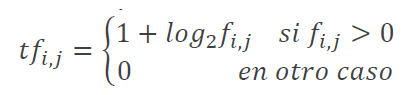

#### FUNCIÓN TF
Se le pasa el documento (diccionario) de la tabla 𝑓𝑖,𝑗 para la creación de la tabla 𝑡𝑓𝑖,𝑗

In [15]:
import math
def TF(documento):                              #RECIBIMOS UN DICCIONARIO QUE ES NUESTRO DOCUMENTO CON LA FRECUENCIA
    tfDict = {}                                 #CREAMOS UN DICCIONARIO PARA TF
    for word, fij in documento.items():         #SE EMPIEZA CON LA LECTURA DE CADA PALABRA DEL DOCUMENTO Y OBTENEMOS SU FRECUENCIA
        if fij != 0:                           
            tfDict[word] = 1 + math.log2(fij)   #SI 𝑓𝑖,𝑗 > 0 SE REALIZA LA OPERACIÓN
        else:
            tfDict[word] = 0                    #EN OTRO CASO SE ASIGNA 0
    return tfDict                               #SE RETORNA UN NUEVO DICCIONARIO(TF)

#### CREACIÓN DE LA TABLA 𝑡𝑓𝑖,𝑗:

In [16]:
tf=[]                        #LISTA DE DICCIONARIOS DE TF
for documento in tabla:      #SE RECORREN LOS DICCIONARIOS DE LA LISTA TABLA
    tf.append(TF(documento)) #SE AGREGA A LA LISTA NUEVOS DICCIONARIOS CREADOS POR LA FUNCIÓN TF

#### IMPRIMIMOS LA TABLA DE TD

In [17]:
TF_DATAFRAME=pd.DataFrame(tf)    #SE CREA UN DATAFRAME DE LA TABLA TF CREADA ANTERIORMENTE
TF1 = TF_DATAFRAME.transpose()   #SE CAMBIAN LAS FILAS POR LAS COLUMNAS Y LAS COLUMNAS POR FILAS
TF1.to_excel('TF.xlsx')#SE CREA UN ARCHIVO DE EXCEL UNICAMENTE PARA VER QUE LOS VALORES SE GUARDARAN CORRECTAMENTE
pd.DataFrame(TF1)      #IMPRIMIMOS EL DATA FRAME

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
esol,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
conmemoracion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
telon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tramit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cualqui,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ocurr,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
divert,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
declaracion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## IDF (FRENCUENCIA INVERSA DEL DOCUMENTO)
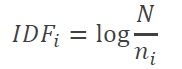
Dónde N es el número de documentos entre la frecuencia del termino

In [18]:
def IDF(documentos):                                #RECIBIMOS TODOS LOS DOCUMENTOS
    import math                                     #IMPORTAMOS MATH PARA PODER TRABAJAR CON LOG BASE 2
    idfDict = {}                                    #CREAMOS UN NUEVO DICCIONARIO PARA IDF
    N = len(documentos)                             #CON LEN OBTENEMOS LA CANTIDAD DE DOCUMENTOS Y SE ASIGNA A N
    idfDict = dict.fromkeys(documentos[0].keys(), 0)#ASIGNAMOS A LOS CONTENIDOS DE LOS DICCIONARIOS 0
    for doc in documentos:                          #VOLVEMOS A OBTENER LA FRENCUENCIA DE LOS TERMINOS PARA ESTE DICCIONARIO
        for word, ni in doc.items():
            if ni > 0:                              #SOLO AQUELLOS QUE SU VALOR SEA MAYOR A 0 PARA PODER REALIZAR LA DIVISIÓN
                idfDict[word] += 1
    
    for word, ni in idfDict.items():                #RECORREMOS EL DICCIONARIO CREADO ANTERIORMENTE
        idfDict[word] = math.log2(N / float(ni))    #ASIGNAMOS LA OPERACIÓN A LA PALABRA DEL DICCIONARIO IDFDICT 
    return idfDict  

In [19]:
import pandas as pd
idfs = IDF(tabla)                                                                       #SE LLAMA A LA FUNCIÓN IDF,LE MANDAMOS TABLA (LA LISTA DE DICCIONARIOS) Y NOS RETORNA UN DICCIONARIO NUEVO
idfsTabla = idfs
df = pd.DataFrame([[key, idfsTabla[key]] for key in idfsTabla.keys()], columns=['Termino', 'IDF'])#SE IMPRIMRE EL DATAFRAME CREADO CON EL NUEVO DICCIONARIO CREADO POR LA FUNCION IDF
df

,Termino,IDF
0,esol,6.658211
1,conmemoracion,4.658211
2,telon,6.658211
3,tramit,4.658211
4,cualqui,4.336283
...,...,...
4792,ocurr,3.073249
4793,divert,5.658211
4794,declaracion,6.658211
4795,anderson,6.658211


## ESQUEMA TF/IDF PESADO
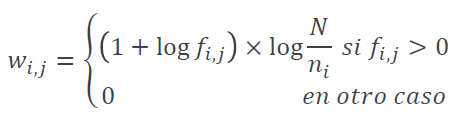
El esquema más popular de los esquemas de términos
pesados es usar una combinación de IDF con
frecuencia de términos

Sea 𝑤𝑖,𝑗el peso del término asociado con el par
𝑘𝑖,𝑑𝑗 el cual se define

In [20]:
def TFIDF(documentotf, idfs):                 #FUNCION TFIDF RECIBE TANTO LA LISTA TF COMO IDF
    tfidf = {}                                #CREAMOS DICCIONARIO TFIDF
    for word, valor in documentotf.items():   #CADA PALABRA DEL DOCUMENTO (TF)
        tfidf[word] = valor*idfs[word]        #EL VALOR DE LA PALABRA DEL DOCUMENTO SE MULTIPLICA POR EL VALOR DE LA FRECUENCIA INVERSA DE LA PALABRA 
    return tfidf   

In [21]:
tfidf=[]                                  #LISTA TFIDF PARA MOSTRAR NUESTRA TABLA 
for documentotf in tf:                    #VAMOS RECORRIENDO LA LISTA DE DICCIONARIOS (CADA DICCIONARIO ES UN DOCUMENTO)
    tfidf.append(TFIDF(documentotf, idfs))#AGREMOS EL DICCIONARIO RETORNADO A NUESTRA LISTA TFIDF

In [22]:
TFIDF_DATAFRAME=pd.DataFrame(tfidf)    #SE CREA UN DATAFRAME DE LA TABLA CREADO ANTERIORMENTE
TFIDF1 = TFIDF_DATAFRAME.transpose()   #SE CAMBIAN LAS FILAS POR LAS COLUMNAS Y LAS COLUMNAS POR FILAS
TFIDF1.to_excel('TFIDF.xlsx')#SE CREA UN ARCHIVO DE EXCEL UNICAMENTE PARA VER QUE LOS VALORES SE GUARDARAN CORRECTAMENTE
pd.DataFrame(TFIDF1)         #IMPRIMIMOS EL DATA FRAME

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
esol,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
conmemoracion,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
telon,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
tramit,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
cualqui,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,4.336283,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ocurr,0.0,0.0,0.0,3.073249,0.0,0.0,0.0,0.0,3.073249,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,3.073249
divert,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
declaracion,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
anderson,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


# 5.Obtener la similitud coseno entre todos los pares de documentos.
Este se obtiene con el producto punto de todos los pares de noticias y se divide entre la multiplicación de las normales
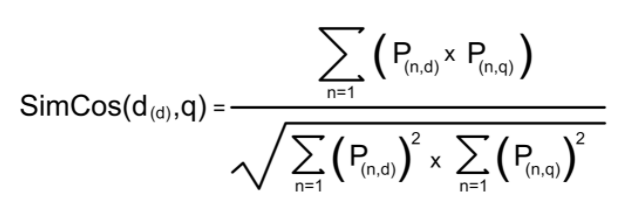
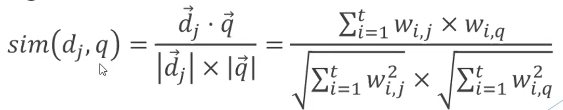

In [23]:
from numpy import dot
from numpy.linalg import norm
for i in range (0,100):
    for j in range(i+1,100):
        lst1 = list(tfidf[i].values())                  #OBTENEMOS LOS VALORES DE TFIDF LA NOTICIA 
        lst2 = list(tfidf[j].values())
        if(norm(lst1)== 0 or norm(lst2)==0):
            print("La normal es 0") 
        else:
            result = dot(lst1, lst2)/(norm(lst1)*norm(lst2))
            print("(Noticia",i+1,"y noticia",j+1,") =",result)
        lst1.clear()
        lst2.clear()

(Noticia 1 y noticia 2 ) = 0.033040844938331045
(Noticia 1 y noticia 3 ) = 0.02876496041247196
(Noticia 1 y noticia 4 ) = 0.06674019983243387
(Noticia 1 y noticia 5 ) = 0.03525938647325747
(Noticia 1 y noticia 6 ) = 0.05197291951507005
(Noticia 1 y noticia 7 ) = 0.0456111105738607
(Noticia 1 y noticia 8 ) = 0.06203369349097014
(Noticia 1 y noticia 9 ) = 0.027145311373296104
(Noticia 1 y noticia 10 ) = 0.013909321186310499
(Noticia 1 y noticia 11 ) = 0.04620228457062027
(Noticia 1 y noticia 12 ) = 0.05835481197942324
(Noticia 1 y noticia 13 ) = 0.020738138126135074
(Noticia 1 y noticia 14 ) = 0.16176570312645236
(Noticia 1 y noticia 15 ) = 0.006754541139918001
(Noticia 1 y noticia 16 ) = 0.022256429734029186
(Noticia 1 y noticia 17 ) = 0.07723726350009107
(Noticia 1 y noticia 18 ) = 0.035858310869234196
(Noticia 1 y noticia 19 ) = 0.08533885028436354
(Noticia 1 y noticia 20 ) = 0.03031516426081726
(Noticia 1 y noticia 21 ) = 0.06873513828469693
(Noticia 1 y noticia 22 ) = 0.030347229601

(Noticia 3 y noticia 6 ) = 0.10601730143438487
(Noticia 3 y noticia 7 ) = 0.058305156862964
(Noticia 3 y noticia 8 ) = 0.02015940649178532
(Noticia 3 y noticia 9 ) = 0.047980525145004005
(Noticia 3 y noticia 10 ) = 0.02601640443357794
(Noticia 3 y noticia 11 ) = 0.02776926220363715
(Noticia 3 y noticia 12 ) = 0.04016016601310173
(Noticia 3 y noticia 13 ) = 0.0227448518904704
(Noticia 3 y noticia 14 ) = 0.0692997433771789
(Noticia 3 y noticia 15 ) = 0.03327304560573424
(Noticia 3 y noticia 16 ) = 0.030565045443377643
(Noticia 3 y noticia 17 ) = 0.058807452869486694
(Noticia 3 y noticia 18 ) = 0.0411029129212649
(Noticia 3 y noticia 19 ) = 0.06383419141527456
(Noticia 3 y noticia 20 ) = 0.04448673792499706
(Noticia 3 y noticia 21 ) = 0.04019637173313774
(Noticia 3 y noticia 22 ) = 0.05369073218011073
(Noticia 3 y noticia 23 ) = 0.03431108172089207
(Noticia 3 y noticia 24 ) = 0.043680154669725996
(Noticia 3 y noticia 25 ) = 0.04005301342540481
(Noticia 3 y noticia 26 ) = 0.060393667698097

(Noticia 5 y noticia 7 ) = 0.04538222017954735
(Noticia 5 y noticia 8 ) = 0.02383725116608059
(Noticia 5 y noticia 9 ) = 0.04031147621994774
(Noticia 5 y noticia 10 ) = 0.05775113112217436
(Noticia 5 y noticia 11 ) = 0.03131259500601949
(Noticia 5 y noticia 12 ) = 0.19646389226116073
(Noticia 5 y noticia 13 ) = 0.05572517777718986
(Noticia 5 y noticia 14 ) = 0.10213258274732727
(Noticia 5 y noticia 15 ) = 0.03523384751815805
(Noticia 5 y noticia 16 ) = 0.04156219488110268
(Noticia 5 y noticia 17 ) = 0.06562329630705212
(Noticia 5 y noticia 18 ) = 0.06597626986903597
(Noticia 5 y noticia 19 ) = 0.05873924356744022
(Noticia 5 y noticia 20 ) = 0.06814693975204977
(Noticia 5 y noticia 21 ) = 0.060497148353135195
(Noticia 5 y noticia 22 ) = 0.06342621002225733
(Noticia 5 y noticia 23 ) = 0.06810118243692599
(Noticia 5 y noticia 24 ) = 0.04541649162955166
(Noticia 5 y noticia 25 ) = 0.051553588529073366
(Noticia 5 y noticia 26 ) = 0.1000403835516559
(Noticia 5 y noticia 27 ) = 0.049260140983

(Noticia 7 y noticia 27 ) = 0.022013068862330214
(Noticia 7 y noticia 28 ) = 0.08655734363480076
(Noticia 7 y noticia 29 ) = 0.019047810373479527
(Noticia 7 y noticia 30 ) = 0.12380045798937454
(Noticia 7 y noticia 31 ) = 0.032120811100021435
(Noticia 7 y noticia 32 ) = 0.03504194954707109
(Noticia 7 y noticia 33 ) = 0.028049775848968544
(Noticia 7 y noticia 34 ) = 0.04208200704045434
(Noticia 7 y noticia 35 ) = 0.01863400457314217
(Noticia 7 y noticia 36 ) = 0.025078419091076963
(Noticia 7 y noticia 37 ) = 0.018911103009170826
(Noticia 7 y noticia 38 ) = 0.026959240960421602
(Noticia 7 y noticia 39 ) = 0.02084594848098085
(Noticia 7 y noticia 40 ) = 0.03844546844542345
(Noticia 7 y noticia 41 ) = 0.013392587982584947
(Noticia 7 y noticia 42 ) = 0.008833501983002007
(Noticia 7 y noticia 43 ) = 0.011071122538302761
(Noticia 7 y noticia 44 ) = 0.0329690477671899
(Noticia 7 y noticia 45 ) = 0.01880214273178166
(Noticia 7 y noticia 46 ) = 0.004112332069658171
(Noticia 7 y noticia 47 ) = 0.

(Noticia 9 y noticia 37 ) = 0.012076982261235977
(Noticia 9 y noticia 38 ) = 0.04225902354932138
(Noticia 9 y noticia 39 ) = 0.007940054774103849
(Noticia 9 y noticia 40 ) = 0.041088615482286775
(Noticia 9 y noticia 41 ) = 0.01073812563134152
(Noticia 9 y noticia 42 ) = 0.02415765184552215
(Noticia 9 y noticia 43 ) = 0.006384681809519821
(Noticia 9 y noticia 44 ) = 0.006070101553595547
(Noticia 9 y noticia 45 ) = 0.0012264566247101828
(Noticia 9 y noticia 46 ) = 0.011076977816723054
(Noticia 9 y noticia 47 ) = 0.018593864878929816
(Noticia 9 y noticia 48 ) = 0.023695165652486732
(Noticia 9 y noticia 49 ) = 0.0020031918247422407
(Noticia 9 y noticia 50 ) = 0.023689593025906914
(Noticia 9 y noticia 51 ) = 0.02867745326177175
(Noticia 9 y noticia 52 ) = 0.03019471917320897
(Noticia 9 y noticia 53 ) = 0.016413202696974646
(Noticia 9 y noticia 54 ) = 0.010403771831984328
(Noticia 9 y noticia 55 ) = 0.031269270209778134
(Noticia 9 y noticia 56 ) = 0.005105732533275682
(Noticia 9 y noticia 57

(Noticia 11 y noticia 32 ) = 0.02872598871685358
(Noticia 11 y noticia 33 ) = 0.038457037697052575
(Noticia 11 y noticia 34 ) = 0.04484578221548516
(Noticia 11 y noticia 35 ) = 0.031782795737623444
(Noticia 11 y noticia 36 ) = 0.013710435502424805
(Noticia 11 y noticia 37 ) = 0.013065265960597006
(Noticia 11 y noticia 38 ) = 0.03044281704920629
(Noticia 11 y noticia 39 ) = 0.030353361639159047
(Noticia 11 y noticia 40 ) = 0.17982033026777403
(Noticia 11 y noticia 41 ) = 0.010650052004234611
(Noticia 11 y noticia 42 ) = 0.021328785108578562
(Noticia 11 y noticia 43 ) = 0.025414310171655942
(Noticia 11 y noticia 44 ) = 0.02816428236448463
(Noticia 11 y noticia 45 ) = 0.007830241986630748
(Noticia 11 y noticia 46 ) = 0.019263483844387135
(Noticia 11 y noticia 47 ) = 0.01890331751208407
(Noticia 11 y noticia 48 ) = 0.009977963179650736
(Noticia 11 y noticia 49 ) = 0.058153056289039835
(Noticia 11 y noticia 50 ) = 0.051662525703658375
(Noticia 11 y noticia 51 ) = 0.0060505505237784755
(Noti

(Noticia 13 y noticia 69 ) = 0.002446110573020612
(Noticia 13 y noticia 70 ) = 0.010865465291189936
(Noticia 13 y noticia 71 ) = 0.009850656037276964
(Noticia 13 y noticia 72 ) = 0.01460041453225474
(Noticia 13 y noticia 73 ) = 0.012843361730155656
(Noticia 13 y noticia 74 ) = 0.018320744698114247
(Noticia 13 y noticia 75 ) = 0.017255179264519246
(Noticia 13 y noticia 76 ) = 0.03619328406447496
(Noticia 13 y noticia 77 ) = 0.012495402121299869
(Noticia 13 y noticia 78 ) = 0.020470790545551943
(Noticia 13 y noticia 79 ) = 0.008768018627547981
(Noticia 13 y noticia 80 ) = 0.028835880646366746
(Noticia 13 y noticia 81 ) = 0.012092498425558224
(Noticia 13 y noticia 82 ) = 0.012159986402219946
(Noticia 13 y noticia 83 ) = 0.012083559837483632
(Noticia 13 y noticia 84 ) = 0.04626251755225502
(Noticia 13 y noticia 85 ) = 0.009885500343686819
(Noticia 13 y noticia 86 ) = 0.003589419735058349
(Noticia 13 y noticia 87 ) = 0.04870145794538713
(Noticia 13 y noticia 88 ) = 0.053069380982360234
(Not

(Noticia 16 y noticia 27 ) = 0.033774598613965576
(Noticia 16 y noticia 28 ) = 0.05506623470194389
(Noticia 16 y noticia 29 ) = 0.07198732606444566
(Noticia 16 y noticia 30 ) = 0.04270728024916644
(Noticia 16 y noticia 31 ) = 0.13195143002972032
(Noticia 16 y noticia 32 ) = 0.027728207564544312
(Noticia 16 y noticia 33 ) = 0.018515024008178987
(Noticia 16 y noticia 34 ) = 0.025315816482351018
(Noticia 16 y noticia 35 ) = 0.01062211819242579
(Noticia 16 y noticia 36 ) = 0.035779895856325655
(Noticia 16 y noticia 37 ) = 0.031526270660198065
(Noticia 16 y noticia 38 ) = 0.06018732500311291
(Noticia 16 y noticia 39 ) = 0.005348647671614175
(Noticia 16 y noticia 40 ) = 0.06555122275663955
(Noticia 16 y noticia 41 ) = 0.008402563258401283
(Noticia 16 y noticia 42 ) = 0.025816659774747792
(Noticia 16 y noticia 43 ) = 0.005547302041740646
(Noticia 16 y noticia 44 ) = 0.03473996138023723
(Noticia 16 y noticia 45 ) = 0.011798022978601521
(Noticia 16 y noticia 46 ) = 0.0045838901891587045
(Notici

(Noticia 18 y noticia 70 ) = 0.018234007203261633
(Noticia 18 y noticia 71 ) = 0.02103768811547718
(Noticia 18 y noticia 72 ) = 0.03393913388825969
(Noticia 18 y noticia 73 ) = 0.034063068767891655
(Noticia 18 y noticia 74 ) = 0.017549833776431538
(Noticia 18 y noticia 75 ) = 0.01590736923830491
(Noticia 18 y noticia 76 ) = 0.025451999420591977
(Noticia 18 y noticia 77 ) = 0.02713228535699424
(Noticia 18 y noticia 78 ) = 0.0162826028288765
(Noticia 18 y noticia 79 ) = 0.01921282120787673
(Noticia 18 y noticia 80 ) = 0.026781532525664394
(Noticia 18 y noticia 81 ) = 0.014063880922373609
(Noticia 18 y noticia 82 ) = 0.017440384757901873
(Noticia 18 y noticia 83 ) = 0.023468287774022368
(Noticia 18 y noticia 84 ) = 0.03616247017196713
(Noticia 18 y noticia 85 ) = 0.016996164273543203
(Noticia 18 y noticia 86 ) = 0.012478077518637547
(Noticia 18 y noticia 87 ) = 0.04859807182410114
(Noticia 18 y noticia 88 ) = 0.08929497248899966
(Noticia 18 y noticia 89 ) = 0.02550324235169932
(Noticia 18

(Noticia 21 y noticia 34 ) = 0.0352731140813255
(Noticia 21 y noticia 35 ) = 0.0313849953382777
(Noticia 21 y noticia 36 ) = 0.013521574648966276
(Noticia 21 y noticia 37 ) = 0.03172053733971809
(Noticia 21 y noticia 38 ) = 0.04483667658136094
(Noticia 21 y noticia 39 ) = 0.06974866607391568
(Noticia 21 y noticia 40 ) = 0.07495390762393847
(Noticia 21 y noticia 41 ) = 0.027942855282698208
(Noticia 21 y noticia 42 ) = 0.06581179528905769
(Noticia 21 y noticia 43 ) = 0.013088507888972319
(Noticia 21 y noticia 44 ) = 0.017873007592777525
(Noticia 21 y noticia 45 ) = 0.021334120449126172
(Noticia 21 y noticia 46 ) = 0.00688057278744485
(Noticia 21 y noticia 47 ) = 0.032571137274667365
(Noticia 21 y noticia 48 ) = 0.017310928093459986
(Noticia 21 y noticia 49 ) = 0.008987663295274295
(Noticia 21 y noticia 50 ) = 0.010698031825052245
(Noticia 21 y noticia 51 ) = 0.03405918706136109
(Noticia 21 y noticia 52 ) = 0.03913554668236992
(Noticia 21 y noticia 53 ) = 0.051303135453196196
(Noticia 21 

(Noticia 23 y noticia 53 ) = 0.0011389462266546946
(Noticia 23 y noticia 54 ) = 0.02689916561063747
(Noticia 23 y noticia 55 ) = 0.0
(Noticia 23 y noticia 56 ) = 0.001920291258765631
(Noticia 23 y noticia 57 ) = 0.007714450514463112
(Noticia 23 y noticia 58 ) = 0.06031134694200718
(Noticia 23 y noticia 59 ) = 0.012164959439043086
(Noticia 23 y noticia 60 ) = 0.028238988718607375
(Noticia 23 y noticia 61 ) = 0.028287721970909212
(Noticia 23 y noticia 62 ) = 0.005940113529432114
(Noticia 23 y noticia 63 ) = 0.017320709050696274
(Noticia 23 y noticia 64 ) = 0.009488770131736548
(Noticia 23 y noticia 65 ) = 0.0028173763362844707
(Noticia 23 y noticia 66 ) = 0.04453468874445721
(Noticia 23 y noticia 67 ) = 0.008826720494744075
(Noticia 23 y noticia 68 ) = 0.005799255309186498
(Noticia 23 y noticia 69 ) = 0.005545869688701731
(Noticia 23 y noticia 70 ) = 0.007953089859937078
(Noticia 23 y noticia 71 ) = 0.011307144397965851
(Noticia 23 y noticia 72 ) = 0.012054392115797929
(Noticia 23 y noti

(Noticia 26 y noticia 31 ) = 0.03500837960511918
(Noticia 26 y noticia 32 ) = 0.06551173677604696
(Noticia 26 y noticia 33 ) = 0.05251853591991718
(Noticia 26 y noticia 34 ) = 0.0368473128516361
(Noticia 26 y noticia 35 ) = 0.020155826445660475
(Noticia 26 y noticia 36 ) = 0.021387006921199103
(Noticia 26 y noticia 37 ) = 0.01794215468808126
(Noticia 26 y noticia 38 ) = 0.03597618065386107
(Noticia 26 y noticia 39 ) = 0.02737636529514132
(Noticia 26 y noticia 40 ) = 0.060139933723550136
(Noticia 26 y noticia 41 ) = 0.007984638692880085
(Noticia 26 y noticia 42 ) = 0.0336360438585762
(Noticia 26 y noticia 43 ) = 0.02656821507226337
(Noticia 26 y noticia 44 ) = 0.03185750764072719
(Noticia 26 y noticia 45 ) = 0.021121060351064723
(Noticia 26 y noticia 46 ) = 0.01623551714439332
(Noticia 26 y noticia 47 ) = 0.02786259071382198
(Noticia 26 y noticia 48 ) = 0.03783678092849449
(Noticia 26 y noticia 49 ) = 0.030297834649424406
(Noticia 26 y noticia 50 ) = 0.020338979313486816
(Noticia 26 y n

(Noticia 28 y noticia 62 ) = 0.030197733627546408
(Noticia 28 y noticia 63 ) = 0.042270784255984024
(Noticia 28 y noticia 64 ) = 0.022401041168743294
(Noticia 28 y noticia 65 ) = 0.020911631951232065
(Noticia 28 y noticia 66 ) = 0.031400710050234225
(Noticia 28 y noticia 67 ) = 0.03989011893548581
(Noticia 28 y noticia 68 ) = 0.022698460407764916
(Noticia 28 y noticia 69 ) = 0.01607238344509588
(Noticia 28 y noticia 70 ) = 0.03624919709983041
(Noticia 28 y noticia 71 ) = 0.014947059407377233
(Noticia 28 y noticia 72 ) = 0.03153387727345907
(Noticia 28 y noticia 73 ) = 0.027651880901034962
(Noticia 28 y noticia 74 ) = 0.01417021715521962
(Noticia 28 y noticia 75 ) = 0.02642136208471091
(Noticia 28 y noticia 76 ) = 0.023947139119510776
(Noticia 28 y noticia 77 ) = 0.023118973202510842
(Noticia 28 y noticia 78 ) = 0.024343421749752583
(Noticia 28 y noticia 79 ) = 0.012065172894923426
(Noticia 28 y noticia 80 ) = 0.027310912279733375
(Noticia 28 y noticia 81 ) = 0.006064255357841531
(Notic

(Noticia 31 y noticia 46 ) = 0.006227601142147768
(Noticia 31 y noticia 47 ) = 0.023959664950862228
(Noticia 31 y noticia 48 ) = 0.0033385632284101347
(Noticia 31 y noticia 49 ) = 0.006330248685351546
(Noticia 31 y noticia 50 ) = 0.008928860116703007
(Noticia 31 y noticia 51 ) = 0.011123440301527886
(Noticia 31 y noticia 52 ) = 0.007465669318758812
(Noticia 31 y noticia 53 ) = 0.008621177392531317
(Noticia 31 y noticia 54 ) = 0.021914573729076608
(Noticia 31 y noticia 55 ) = 0.001554814647806666
(Noticia 31 y noticia 56 ) = 0.022334449127157728
(Noticia 31 y noticia 57 ) = 0.0232733753268469
(Noticia 31 y noticia 58 ) = 0.007473606660573896
(Noticia 31 y noticia 59 ) = 0.028766678819539673
(Noticia 31 y noticia 60 ) = 0.052217731874755514
(Noticia 31 y noticia 61 ) = 0.05230784628810933
(Noticia 31 y noticia 62 ) = 0.020556948614401896
(Noticia 31 y noticia 63 ) = 0.04498555125767203
(Noticia 31 y noticia 64 ) = 0.07094708931680599
(Noticia 31 y noticia 65 ) = 0.009230552552364334
(Not

(Noticia 33 y noticia 84 ) = 0.013346309021837251
(Noticia 33 y noticia 85 ) = 0.008362028756217912
(Noticia 33 y noticia 86 ) = 0.011803308993745409
(Noticia 33 y noticia 87 ) = 0.014594813758672387
(Noticia 33 y noticia 88 ) = 0.00417889487462553
(Noticia 33 y noticia 89 ) = 0.015530009023725855
(Noticia 33 y noticia 90 ) = 0.010591489219309984
(Noticia 33 y noticia 91 ) = 0.014868288585211881
(Noticia 33 y noticia 92 ) = 0.01174559451420794
(Noticia 33 y noticia 93 ) = 0.006771786185559942
(Noticia 33 y noticia 94 ) = 0.007458595556700804
(Noticia 33 y noticia 95 ) = 0.008245135020241342
(Noticia 33 y noticia 96 ) = 0.007930136111252553
(Noticia 33 y noticia 97 ) = 0.00514633196218193
(Noticia 33 y noticia 98 ) = 0.009773157444931985
(Noticia 33 y noticia 99 ) = 0.008086503874449829
(Noticia 33 y noticia 100 ) = 0.016082805914913414
(Noticia 34 y noticia 35 ) = 0.029022269792108236
(Noticia 34 y noticia 36 ) = 0.3605004113059509
(Noticia 34 y noticia 37 ) = 0.3606870339894988
(Notic

(Noticia 36 y noticia 79 ) = 0.051493663821367525
(Noticia 36 y noticia 80 ) = 0.032663592830843274
(Noticia 36 y noticia 81 ) = 0.01582964214851477
(Noticia 36 y noticia 82 ) = 0.002299916136222658
(Noticia 36 y noticia 83 ) = 0.01315209583622791
(Noticia 36 y noticia 84 ) = 0.037279995794495986
(Noticia 36 y noticia 85 ) = 0.020805129825493228
(Noticia 36 y noticia 86 ) = 0.011391627642025419
(Noticia 36 y noticia 87 ) = 0.012079261068910937
(Noticia 36 y noticia 88 ) = 0.04543733791816178
(Noticia 36 y noticia 89 ) = 0.06889067704100547
(Noticia 36 y noticia 90 ) = 0.04869245091764821
(Noticia 36 y noticia 91 ) = 0.025128616296222834
(Noticia 36 y noticia 92 ) = 0.012290610521447634
(Noticia 36 y noticia 93 ) = 0.016163350832004396
(Noticia 36 y noticia 94 ) = 0.006992060199363565
(Noticia 36 y noticia 95 ) = 0.0111731023256941
(Noticia 36 y noticia 96 ) = 0.02290892088556301
(Noticia 36 y noticia 97 ) = 0.008939974718755492
(Noticia 36 y noticia 98 ) = 0.02273149236434611
(Noticia 

(Noticia 40 y noticia 47 ) = 0.032062085298275
(Noticia 40 y noticia 48 ) = 0.020495848032331274
(Noticia 40 y noticia 49 ) = 0.01370494075813156
(Noticia 40 y noticia 50 ) = 0.01713796411882451
(Noticia 40 y noticia 51 ) = 0.022557172367241116
(Noticia 40 y noticia 52 ) = 0.026193822710278914
(Noticia 40 y noticia 53 ) = 0.03228003333255552
(Noticia 40 y noticia 54 ) = 0.024875276821543967
(Noticia 40 y noticia 55 ) = 0.026720957040428817
(Noticia 40 y noticia 56 ) = 0.02245098459271046
(Noticia 40 y noticia 57 ) = 0.024539787443737315
(Noticia 40 y noticia 58 ) = 0.02556979935100534
(Noticia 40 y noticia 59 ) = 0.024270092794659595
(Noticia 40 y noticia 60 ) = 0.031235099707903752
(Noticia 40 y noticia 61 ) = 0.03128900347938461
(Noticia 40 y noticia 62 ) = 0.07838237257821681
(Noticia 40 y noticia 63 ) = 0.048215998691453855
(Noticia 40 y noticia 64 ) = 0.05710223886913577
(Noticia 40 y noticia 65 ) = 0.024171317488199624
(Noticia 40 y noticia 66 ) = 0.014948587422399105
(Noticia 40

(Noticia 43 y noticia 94 ) = 0.05265076934769425
(Noticia 43 y noticia 95 ) = 0.037394133192775764
(Noticia 43 y noticia 96 ) = 0.020699345256629753
(Noticia 43 y noticia 97 ) = 0.06782943921869802
(Noticia 43 y noticia 98 ) = 0.05150035093577386
(Noticia 43 y noticia 99 ) = 0.044644894576458156
(Noticia 43 y noticia 100 ) = 0.07632584438763305
(Noticia 44 y noticia 45 ) = 0.07539092346753765
(Noticia 44 y noticia 46 ) = 0.02604133876418686
(Noticia 44 y noticia 47 ) = 0.04314667590117812
(Noticia 44 y noticia 48 ) = 0.06567197781368915
(Noticia 44 y noticia 49 ) = 0.12689702126543265
(Noticia 44 y noticia 50 ) = 0.08505638354426845
(Noticia 44 y noticia 51 ) = 0.009925121684658252
(Noticia 44 y noticia 52 ) = 0.017861775462303366
(Noticia 44 y noticia 53 ) = 0.03879149192164065
(Noticia 44 y noticia 54 ) = 0.010153001618289244
(Noticia 44 y noticia 55 ) = 0.03023511708409916
(Noticia 44 y noticia 56 ) = 0.0002517903275697557
(Noticia 44 y noticia 57 ) = 0.010668038491087299
(Noticia 4

(Noticia 47 y noticia 88 ) = 0.02525631314453257
(Noticia 47 y noticia 89 ) = 0.0069899563504534044
(Noticia 47 y noticia 90 ) = 0.029318328418621847
(Noticia 47 y noticia 91 ) = 0.007094344697865433
(Noticia 47 y noticia 92 ) = 0.03703584287665999
(Noticia 47 y noticia 93 ) = 0.01740540717497453
(Noticia 47 y noticia 94 ) = 0.033479554123504944
(Noticia 47 y noticia 95 ) = 0.07670495290043634
(Noticia 47 y noticia 96 ) = 0.014912432402130419
(Noticia 47 y noticia 97 ) = 0.048276938320193044
(Noticia 47 y noticia 98 ) = 0.03965756253375444
(Noticia 47 y noticia 99 ) = 0.06286044988884495
(Noticia 47 y noticia 100 ) = 0.025708051693517316
(Noticia 48 y noticia 49 ) = 0.22195005628424702
(Noticia 48 y noticia 50 ) = 0.22014375735025457
(Noticia 48 y noticia 51 ) = 0.0011684022817631406
(Noticia 48 y noticia 52 ) = 0.011888174965870702
(Noticia 48 y noticia 53 ) = 0.039681551651991324
(Noticia 48 y noticia 54 ) = 0.006217242269866239
(Noticia 48 y noticia 55 ) = 0.0025114795679487705
(Not

(Noticia 52 y noticia 54 ) = 0.10217738836684356
(Noticia 52 y noticia 55 ) = 0.026941494125858893
(Noticia 52 y noticia 56 ) = 0.007069048788227581
(Noticia 52 y noticia 57 ) = 0.03109231992198344
(Noticia 52 y noticia 58 ) = 0.02391628734811522
(Noticia 52 y noticia 59 ) = 0.024559538007101388
(Noticia 52 y noticia 60 ) = 0.039658947746158586
(Noticia 52 y noticia 61 ) = 0.039727388918956864
(Noticia 52 y noticia 62 ) = 0.009843910380208815
(Noticia 52 y noticia 63 ) = 0.016909214115146877
(Noticia 52 y noticia 64 ) = 0.02817178464928965
(Noticia 52 y noticia 65 ) = 0.03252482561654492
(Noticia 52 y noticia 66 ) = 0.009059592911315386
(Noticia 52 y noticia 67 ) = 0.009576349592059169
(Noticia 52 y noticia 68 ) = 0.025018453658018257
(Noticia 52 y noticia 69 ) = 0.00019403817079685417
(Noticia 52 y noticia 70 ) = 0.01633786804647192
(Noticia 52 y noticia 71 ) = 0.026276507102907423
(Noticia 52 y noticia 72 ) = 0.09110892359246485
(Noticia 52 y noticia 73 ) = 0.029199152379212803
(Noti

(Noticia 56 y noticia 76 ) = 0.01162281930621423
(Noticia 56 y noticia 77 ) = 0.009804858893201453
(Noticia 56 y noticia 78 ) = 0.012103132189371544
(Noticia 56 y noticia 79 ) = 0.01213870478752163
(Noticia 56 y noticia 80 ) = 0.0037086915575824803
(Noticia 56 y noticia 81 ) = 0.007556949162040147
(Noticia 56 y noticia 82 ) = 0.022895155592544417
(Noticia 56 y noticia 83 ) = 0.00619953288980934
(Noticia 56 y noticia 84 ) = 0.024490787808348905
(Noticia 56 y noticia 85 ) = 0.007793045185112583
(Noticia 56 y noticia 86 ) = 0.013712974125820478
(Noticia 56 y noticia 87 ) = 0.020435522607858227
(Noticia 56 y noticia 88 ) = 0.015134664929844641
(Noticia 56 y noticia 89 ) = 0.03205780985188328
(Noticia 56 y noticia 90 ) = 0.04227564801857408
(Noticia 56 y noticia 91 ) = 0.014556156960439272
(Noticia 56 y noticia 92 ) = 0.007202895295422822
(Noticia 56 y noticia 93 ) = 0.01525386950115666
(Noticia 56 y noticia 94 ) = 0.01273267412129321
(Noticia 56 y noticia 95 ) = 0.0030016674167224716
(Noti

(Noticia 61 y noticia 77 ) = 0.03366066871265747
(Noticia 61 y noticia 78 ) = 0.027933390600910126
(Noticia 61 y noticia 79 ) = 0.03301320943695614
(Noticia 61 y noticia 80 ) = 0.004597128123294632
(Noticia 61 y noticia 81 ) = 0.01804747107987975
(Noticia 61 y noticia 82 ) = 0.01209203226008576
(Noticia 61 y noticia 83 ) = 0.01819693723030253
(Noticia 61 y noticia 84 ) = 0.007332040040395709
(Noticia 61 y noticia 85 ) = 0.001912783735599916
(Noticia 61 y noticia 86 ) = 0.016568162593352854
(Noticia 61 y noticia 87 ) = 0.011170411771226109
(Noticia 61 y noticia 88 ) = 0.023027330057589224
(Noticia 61 y noticia 89 ) = 0.009052129244797707
(Noticia 61 y noticia 90 ) = 0.010276039429350015
(Noticia 61 y noticia 91 ) = 0.00840449416934324
(Noticia 61 y noticia 92 ) = 0.02688645245220072
(Noticia 61 y noticia 93 ) = 0.03866883757951896
(Noticia 61 y noticia 94 ) = 0.021669776570132106
(Noticia 61 y noticia 95 ) = 0.020614645055608918
(Noticia 61 y noticia 96 ) = 0.00791750151914996
(Noticia 

(Noticia 66 y noticia 99 ) = 0.00973202521234922
(Noticia 66 y noticia 100 ) = 0.01644141074552507
(Noticia 67 y noticia 68 ) = 0.05666470334132929
(Noticia 67 y noticia 69 ) = 0.03869834369319875
(Noticia 67 y noticia 70 ) = 0.34109071132330937
(Noticia 67 y noticia 71 ) = 0.03979266799186538
(Noticia 67 y noticia 72 ) = 0.05812261823674905
(Noticia 67 y noticia 73 ) = 0.03715958484239379
(Noticia 67 y noticia 74 ) = 0.08199639646435095
(Noticia 67 y noticia 75 ) = 0.06243086515592974
(Noticia 67 y noticia 76 ) = 0.035420451081903434
(Noticia 67 y noticia 77 ) = 0.014768204476712007
(Noticia 67 y noticia 78 ) = 0.025612592442205782
(Noticia 67 y noticia 79 ) = 0.022639935481621423
(Noticia 67 y noticia 80 ) = 0.017790304468124744
(Noticia 67 y noticia 81 ) = 0.021257110704786412
(Noticia 67 y noticia 82 ) = 0.015012107627206273
(Noticia 67 y noticia 83 ) = 0.019195223091948842
(Noticia 67 y noticia 84 ) = 0.027050974654894575
(Noticia 67 y noticia 85 ) = 0.008832355463168472
(Noticia 

(Noticia 74 y noticia 76 ) = 0.025477321812540657
(Noticia 74 y noticia 77 ) = 0.007762417228753196
(Noticia 74 y noticia 78 ) = 0.018909797636536215
(Noticia 74 y noticia 79 ) = 0.01870631449590039
(Noticia 74 y noticia 80 ) = 0.010655953348162713
(Noticia 74 y noticia 81 ) = 0.039646229531095895
(Noticia 74 y noticia 82 ) = 0.018838204058090585
(Noticia 74 y noticia 83 ) = 0.026731843524454037
(Noticia 74 y noticia 84 ) = 0.0288738610135897
(Noticia 74 y noticia 85 ) = 0.025766937705717547
(Noticia 74 y noticia 86 ) = 0.01791344384574384
(Noticia 74 y noticia 87 ) = 0.024530952595178387
(Noticia 74 y noticia 88 ) = 0.009515314047304968
(Noticia 74 y noticia 89 ) = 0.0030236704702545445
(Noticia 74 y noticia 90 ) = 0.04470499928472074
(Noticia 74 y noticia 91 ) = 0.017808184423532793
(Noticia 74 y noticia 92 ) = 0.031087734359745194
(Noticia 74 y noticia 93 ) = 0.009643553274070136
(Noticia 74 y noticia 94 ) = 0.016986003560490927
(Noticia 74 y noticia 95 ) = 0.01929011063504302
(Noti

(Noticia 82 y noticia 92 ) = 0.014169179705933574
(Noticia 82 y noticia 93 ) = 0.026354051867544206
(Noticia 82 y noticia 94 ) = 0.01620341763689584
(Noticia 82 y noticia 95 ) = 0.03995360530111645
(Noticia 82 y noticia 96 ) = 0.01495521521798571
(Noticia 82 y noticia 97 ) = 0.027830746995336213
(Noticia 82 y noticia 98 ) = 0.06253260915203335
(Noticia 82 y noticia 99 ) = 0.015541348267981165
(Noticia 82 y noticia 100 ) = 0.03091210332840457
(Noticia 83 y noticia 84 ) = 0.024790795476101524
(Noticia 83 y noticia 85 ) = 0.008638446033830365
(Noticia 83 y noticia 86 ) = 0.017900661440957522
(Noticia 83 y noticia 87 ) = 0.013778389980441718
(Noticia 83 y noticia 88 ) = 0.013859220367495775
(Noticia 83 y noticia 89 ) = 0.011046517227030263
(Noticia 83 y noticia 90 ) = 0.014321896082257889
(Noticia 83 y noticia 91 ) = 0.015176338510639216
(Noticia 83 y noticia 92 ) = 0.0048030961484400525
(Noticia 83 y noticia 93 ) = 0.015624024260993805
(Noticia 83 y noticia 94 ) = 0.01442027878523475
(Not